## Seaborn
> * Seaborn is a Python data visualization library based on <u> matplotlib</u>. It provides a high-level interface for drawing attractive and informative statistical graphics.
> * <b> A Graph is worth a thousand words</b>. Seaborn has great ploting functions which operate on pandas dataframe and arrays contains whole dataset.

## Seaborn Features:
> * Relational
> * Distribution
> * Categorical
> * Regression
> * Multiples
> * Style
> * Color

This notebook discusses about <b> Relational </b> seaborn feature. The <u>figure-level function</u> that we are going to see is <b>relplot()</b> for visualizing statistical relationships using <b> scatter plots & line plots</b>

### Visualizing statistical relationships
> * Statistical analysis is a process of understanding how variables in a dataset relate to each other and how those relationships depend on other variables. Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.

### Install seaborn library

In [1]:
#pip install seanborn
!pip3 install seaborn

In [2]:
#conda install seaborn

In [ ]:
#!pip3 install emoji --upgrade

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style(style="darkgrid")  # set graph style to darkgrid, possible options {darkgrid, whitegrid, dark, white, ticks}

#### Get the list of datasets available in seaborn library

In [164]:
dataset_names = sns.get_dataset_names()
df = pd.DataFrame(dataset_names, columns=['Seaborn Datasets'])
df

/home/gb/.local/lib/python3.8/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /home/gb/.local/lib/python3.8/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


,Seaborn Datasets
0,anagrams
1,anscombe
2,attention
3,brain_networks
4,car_crashes
5,diamonds
6,dots
7,exercise
8,flights
9,fmri


### Emphasizing continuity with line plots
> * If you would like to understand the changes in one variable as function of time or continuous variable. Then line plot is the good choice.
> * In seaborn, this can be accomplished by the <b>lineplot()</b> function, either directly or with <b>relplot()</b> by setting <b>kind="line"</b>

In [165]:
flights = sns.load_dataset("flights")

In [166]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [167]:
flights.describe(include="all")

,year,month,passengers
count,144.000000,144,144.000000
unique,NaN,12,NaN
top,NaN,December,NaN
freq,NaN,12,NaN
mean,1954.500000,NaN,280.298611
std,3.464102,NaN,119.966317
min,1949.000000,NaN,104.000000
25%,1951.750000,NaN,180.000000
50%,1954.500000,NaN,265.500000
75%,1957.250000,NaN,360.500000


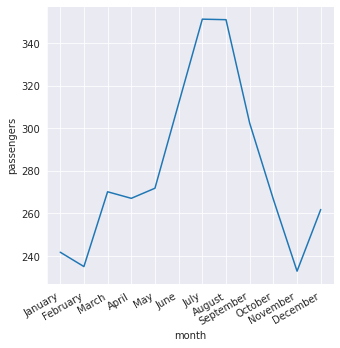

In [168]:
g = sns.relplot(x="month", y="passengers", kind="line", ci=None, data=flights) # ci is confidence interval.
g.fig.autofmt_xdate()
plt.show()

* Because <b>lineplot()</b> assumes that you are most often trying to draw <b>y as a function of x</b>, the default behavior is to sort the data by the x values before plotting. However, this can be disabled as follows:

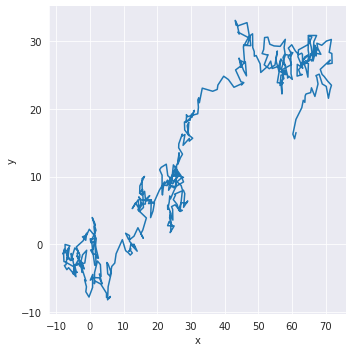

In [29]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=['x', 'y'])
sns.relplot(x="x", y="y", kind="line", sort=False, data=df)
plt.show()

* Plot line graph with 95% confidence interval around the mean.
* The confidence intervals are computed using <b>bootstrapping</b>, which can be <b>time-intensive for larger datasets.

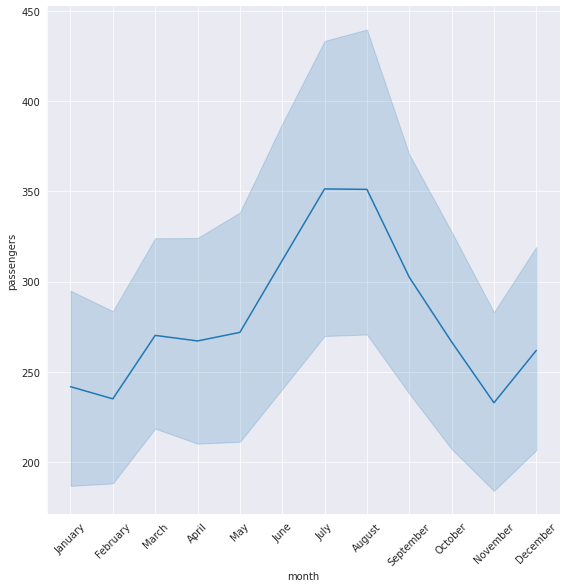

In [169]:
g = sns.relplot(x="month", y="passengers", kind="line", height=8, data=flights);
g.fig.autofmt_xdate(bottom=0.1, rotation=45, ha='center', which='major')
plt.show()

* Another good option, especially with larger data, is to represent the <b>spread of the distribution at each timepoint</b> by plotting the <b>standard deviation</b> instead of a confidence interval:

In [56]:
fmri = sns.load_dataset("fmri") # load fmri dataset
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [57]:
fmri.describe(include='all')

,subject,timepoint,event,region,signal
count,1064,1064.000000,1064,1064,1064.000000
unique,14,NaN,2,2,NaN
top,s2,NaN,stim,frontal,NaN
freq,76,NaN,532,532,NaN
mean,NaN,9.000000,NaN,NaN,0.003540
std,NaN,5.479801,NaN,NaN,0.093930
min,NaN,0.000000,NaN,NaN,-0.255486
25%,NaN,4.000000,NaN,NaN,-0.046070
50%,NaN,9.000000,NaN,NaN,-0.013653
75%,NaN,14.000000,NaN,NaN,0.024293


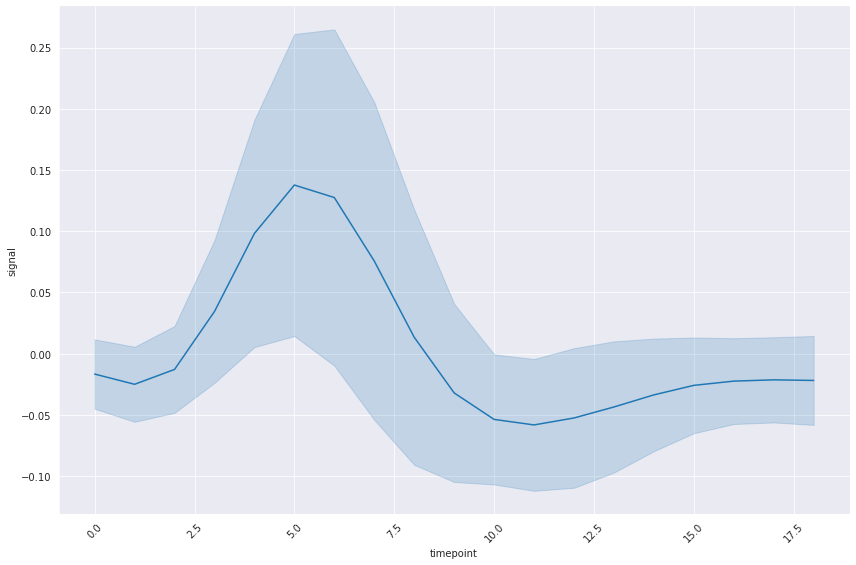

In [175]:
g = sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", height=8, aspect=1.5, data=fmri);  #ci="sd" -> standard deviation
g.fig.autofmt_xdate(bottom=0.1, rotation=45, ha='center', which='major')
plt.show()

* To turn off aggregation altogether, set the **estimator** parameter to <b>None</b> This might produce a strange effect when the data have multiple observations at each point.

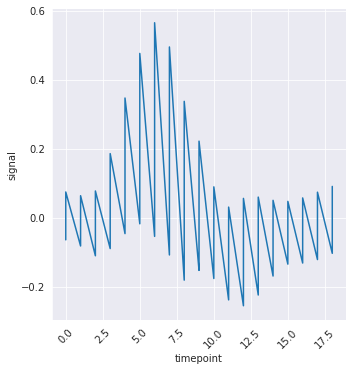

In [66]:
fmri = sns.load_dataset("fmri")
g = sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri);  #ci="sd" -> standard deviation
g.fig.autofmt_xdate(bottom=0.1, rotation=45, ha='center', which='major')
plt.show()

### Plotting subsets of data with semantic mappings
> * The **lineplot()** function has the same flexibility as **scatterplot()**: it can show up to three additional variables by modifying the **hue, size, and style** of the plot elements.
> * Using semantics in **lineplot()** will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

<Figure size 2880x2880 with 0 Axes>

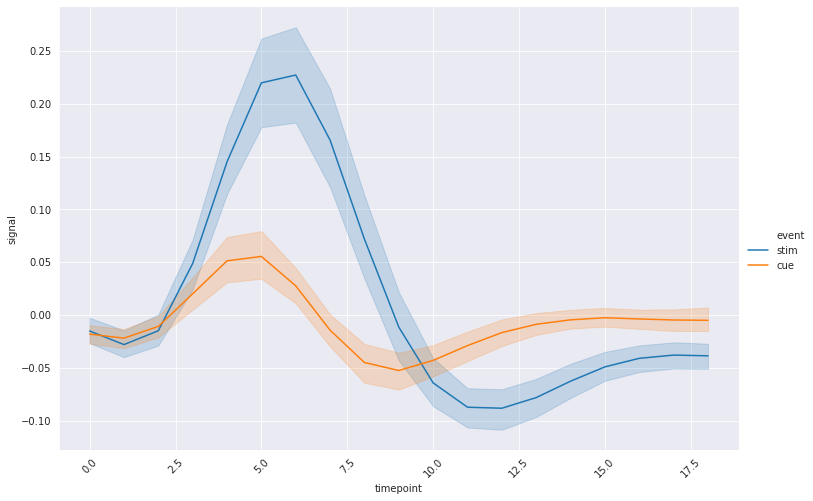

In [178]:
plt.figure(figsize=(40, 40))
g = sns.relplot(x="timepoint", y="signal", hue="event", kind="line", height=7, aspect=1.5, data=fmri);
g.fig.autofmt_xdate(bottom=0.1, rotation=45, ha='center', which='major')
plt.show()

* Adding a style semantic to a line plot changes the pattern of dashes in the line by default

In [73]:
fmri.region.value_counts()

frontal     532
parietal    532
Name: region, dtype: int64

In [74]:
fmri.event.value_counts()

stim    532
cue     532
Name: event, dtype: int64

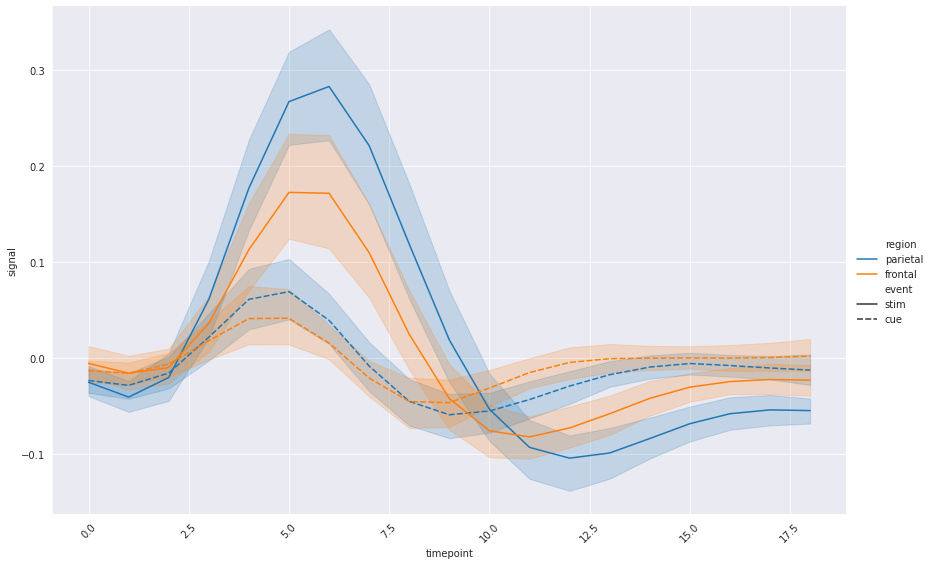

In [179]:
g = sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", height=8, aspect=1.5, data=fmri);
g.fig.autofmt_xdate(bottom=0.1, rotation=45, ha='center', which='major')
plt.show()

* Identify subsets by the markers used at each observation, either together with the dashes or instead of them:

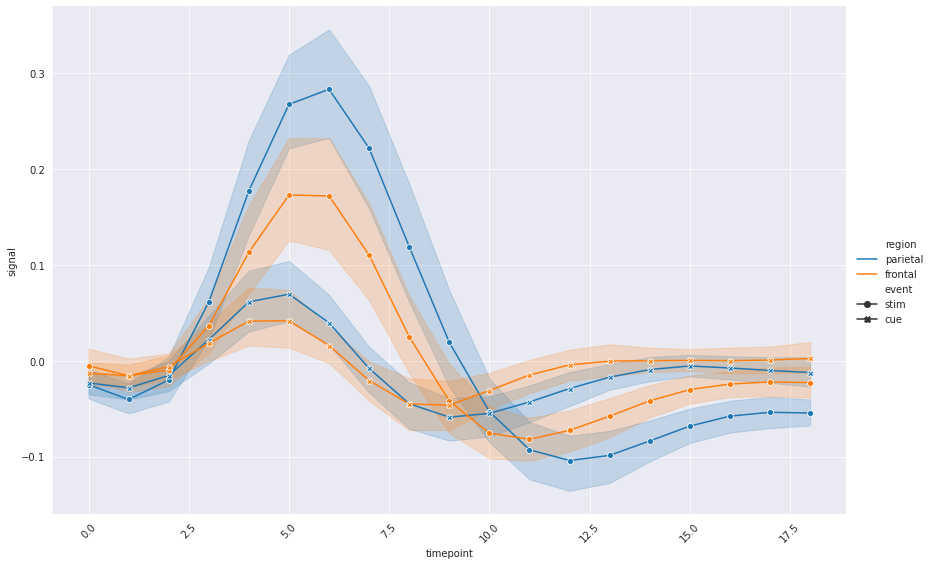

In [180]:
g = sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", dashes=False, markers=True, 
                height=8, aspect=1.5, data=fmri);
g.fig.autofmt_xdate(bottom=0.1, rotation=45, ha='center', which='major')
plt.show()

In [83]:
fmri.subject.value_counts()

s2     76
s11    76
s4     76
s12    76
s9     76
s7     76
s3     76
s5     76
s10    76
s1     76
s8     76
s13    76
s0     76
s6     76
Name: subject, dtype: int64

In [86]:
fmri.query("event == 'stim'").value_counts()

subject  timepoint  event  region    signal   
s9       18         stim   parietal  -0.103513    1
s12      14         stim   parietal  -0.068297    1
         7          stim   parietal   0.050173    1
         8          stim   frontal   -0.041572    1
                           parietal  -0.027577    1
                                                 ..
s5       9          stim   frontal   -0.097376    1
                           parietal  -0.074843    1
         10         stim   frontal   -0.118451    1
                           parietal  -0.114762    1
s0       0          stim   frontal   -0.021452    1
Length: 532, dtype: int64

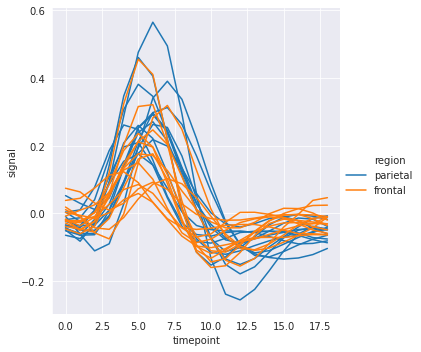

In [87]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

The default colormap and handling of the legend in **lineplot()** also depends on whether the hue semantic is **`categorical or numeric`**.

In [89]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


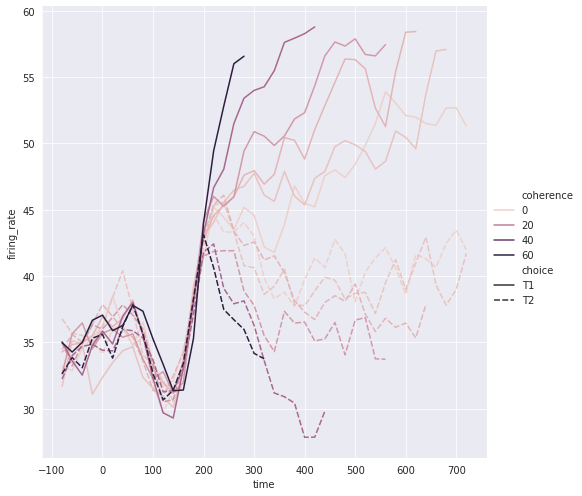

In [181]:
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice", kind="line", height=7, data=dots);

* It may happen that, even though the **hue** variable is **numeric**, it is poorly represented by a linear color scale. That’s the case here, where the levels of the hue variable are **logarithmically scaled**. You can provide specific color values for each line by passing a list or dictionary:

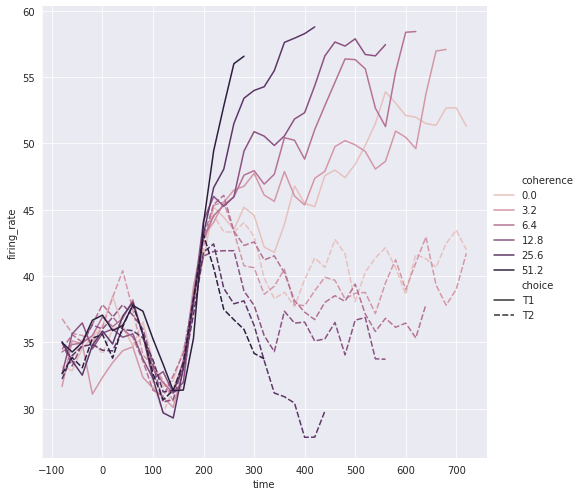

In [182]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate", hue="coherence", style="choice", kind="line", 
            palette=palette, height=7, data=dots);

Now, you can alter how the **colormap is normalized**:

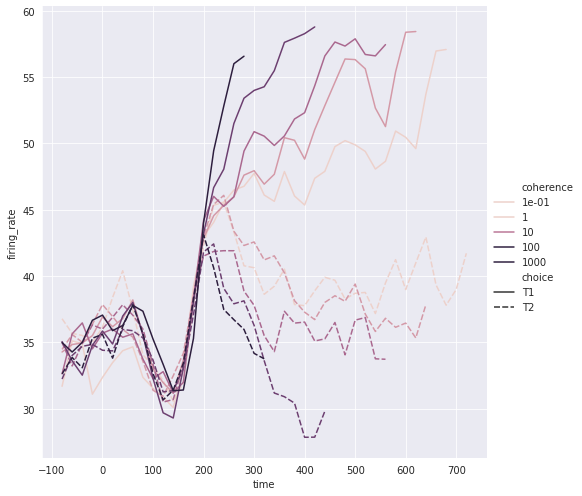

In [183]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line",
            height=7,
            data=dots.query("coherence > 0"));

* The third semantic, size, changes the width of the lines:

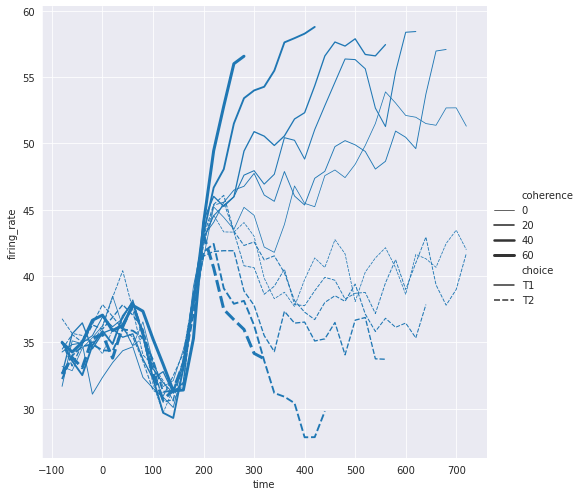

In [184]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", height=7, data=dots);

While the **size** variable will typically be numeric, it’s also possible to map a categorical variable with the width of the lines. Be cautious when doing so, because it will be difficult to distinguish much more than “thick” vs “thin” lines. However, dashes can be hard to perceive when lines have high-frequency variability, so using different widths may be more effective in that case:

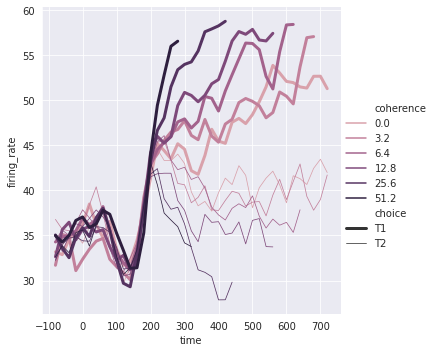

In [99]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

### Plotting with date data
> * Line plots are often used to visualize data associated with real dates and times.

* install `yahoo_fin` package

In [101]:
!pip3 install yahoo_fin  

In [103]:
import yahoo_fin.stock_info as si

In [142]:
infy = si.get_data("infy.ns", start_date='2020-06-01', end_date='2020-09-01')

In [143]:
infy

,open,high,low,close,adjclose,volume,ticker
2020-06-01,698.750000,706.650024,691.500000,699.549988,699.549988,12276438,INFY.NS
2020-06-02,700.500000,711.650024,697.549988,708.099976,708.099976,7059304,INFY.NS
2020-06-03,710.700012,711.900024,696.000000,701.549988,701.549988,11378568,INFY.NS
2020-06-04,702.000000,709.450012,697.500000,707.750000,707.750000,10782424,INFY.NS
2020-06-05,707.000000,711.700012,700.599976,703.549988,703.549988,7718679,INFY.NS
...,...,...,...,...,...,...,...
2020-08-25,947.500000,948.650024,933.599976,938.099976,938.099976,6233918,INFY.NS
2020-08-26,941.250000,954.250000,938.400024,950.799988,950.799988,5153601,INFY.NS
2020-08-27,960.000000,960.950012,945.200012,947.049988,947.049988,6154280,INFY.NS
2020-08-28,951.450012,952.500000,933.049988,935.250000,935.250000,7593610,INFY.NS


In [152]:
infy.describe(include="all")

<ipython-input-152-7cb79f8615d8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  infy.describe(include="all")


,open,high,low,close,adjclose,volume,ticker,date
count,66.000000,66.000000,66.000000,66.000000,66.000000,6.600000e+01,66,66
unique,NaN,NaN,NaN,NaN,NaN,NaN,1,66
top,NaN,NaN,NaN,NaN,NaN,NaN,INFY.NS,2020-07-03 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,66,1
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-31 00:00:00
mean,837.388640,849.403035,829.380302,839.264394,839.264394,1.201515e+07,NaN,NaN
std,112.951188,112.891491,110.565997,110.629866,110.629866,1.129361e+07,NaN,NaN
min,675.799988,695.150024,675.500000,687.549988,687.549988,4.663873e+06,NaN,NaN
25%,712.750000,726.049988,709.250015,718.362488,718.362488,6.946370e+06,NaN,NaN


In [153]:
new_index = np.arange(0, len(infy))
infy['date'] = infy.index
infy.set_index(new_index)

,open,high,low,close,adjclose,volume,ticker,date
0,698.750000,706.650024,691.500000,699.549988,699.549988,12276438,INFY.NS,2020-06-01
1,700.500000,711.650024,697.549988,708.099976,708.099976,7059304,INFY.NS,2020-06-02
2,710.700012,711.900024,696.000000,701.549988,701.549988,11378568,INFY.NS,2020-06-03
3,702.000000,709.450012,697.500000,707.750000,707.750000,10782424,INFY.NS,2020-06-04
4,707.000000,711.700012,700.599976,703.549988,703.549988,7718679,INFY.NS,2020-06-05
...,...,...,...,...,...,...,...,...
61,947.500000,948.650024,933.599976,938.099976,938.099976,6233918,INFY.NS,2020-08-25
62,941.250000,954.250000,938.400024,950.799988,950.799988,5153601,INFY.NS,2020-08-26
63,960.000000,960.950012,945.200012,947.049988,947.049988,6154280,INFY.NS,2020-08-27
64,951.450012,952.500000,933.049988,935.250000,935.250000,7593610,INFY.NS,2020-08-28


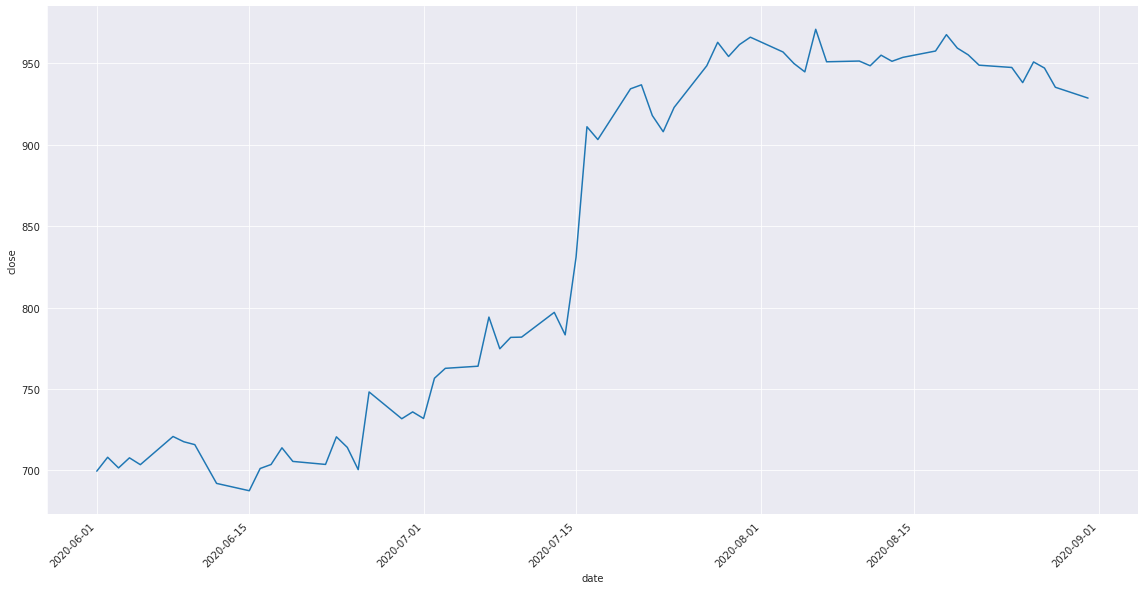

In [163]:
g = sns.relplot(x="date", y="close", kind="line", height=8, aspect=2, data=infy)
g.fig.autofmt_xdate(bottom=0.1, rotation=45, ha='right', which='both')
plt.show()

### Showing multiple relationships with facets
> * We’ve emphasized in this tutorial that, while these functions can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?
> * The best approach may be to make more than one plot. Because **relplot()** is based on the **FacetGrid**, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

In [187]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


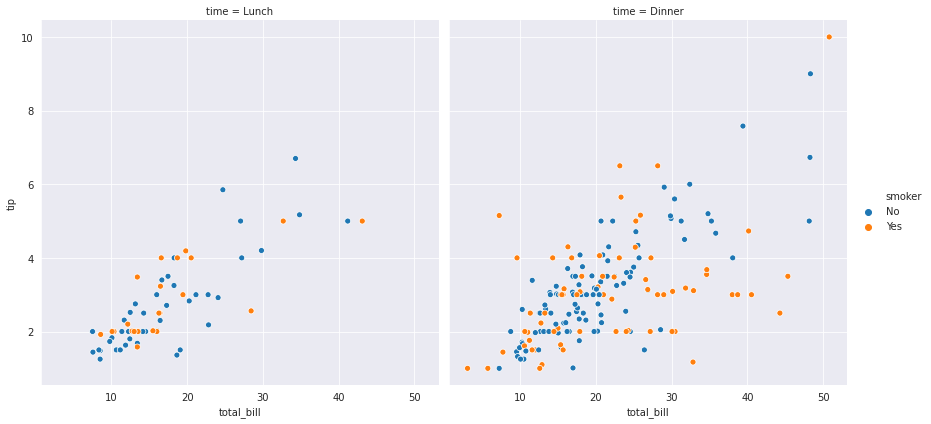

In [189]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", height=6, data=tips) # imps is col parameter

* You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

In [191]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [197]:
fmri.subject.value_counts(normalize=False, sort=True, ascending=True)

s6     76
s0     76
s13    76
s8     76
s1     76
s10    76
s5     76
s3     76
s7     76
s9     76
s12    76
s4     76
s11    76
s2     76
Name: subject, dtype: int64

In [199]:
fmri.region.value_counts()

frontal     532
parietal    532
Name: region, dtype: int64

In [200]:
fmri.event.value_counts()

stim    532
cue     532
Name: event, dtype: int64

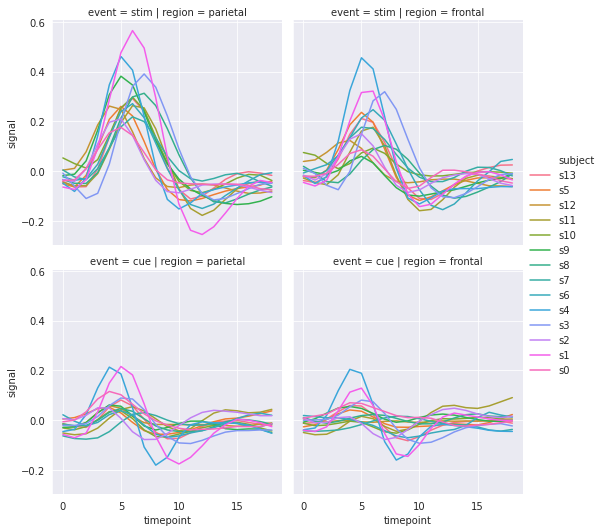

In [204]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3.75,
            kind="line", estimator=None, data=fmri);

* When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

In [206]:
fmri.query("region == 'frontal'")

,subject,timepoint,event,region,signal
67,s0,0,stim,frontal,-0.021452
170,s2,6,stim,frontal,0.101050
267,s10,4,stim,frontal,0.030044
268,s11,4,stim,frontal,0.075957
269,s3,0,stim,frontal,0.011056
...,...,...,...,...,...
1058,s1,8,cue,frontal,-0.136059
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939


These visualizations, which are often called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. While you should make use of the flexibility afforded by **scatterplot()** and **relplot()**, `always try to keep in mind that several simple plots are usually more effective than one complex plot`.

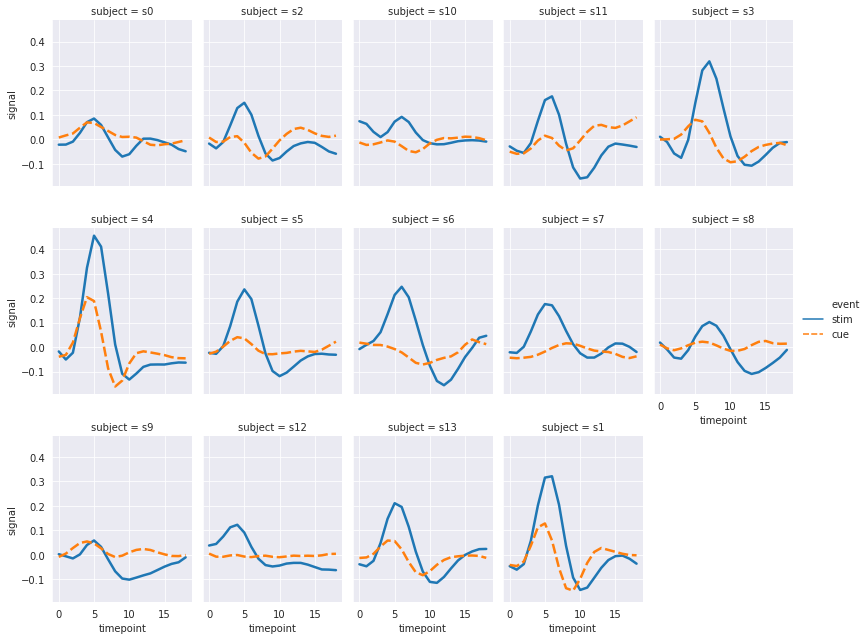

In [210]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));